In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, f1_score

### Pysentimento validation

The following dataset provides a validation of the [pysentimiento algorithm](https://huggingface.co/pysentimiento/robertuito-sentiment-analysis). The rows of the dataset are the following:
- mention: sentence with a mention to a given candidate.
- url: url from where the mention comes from.
- RC1, RC2, RC3: researchers classification of the mention. 1 means a positive mention, 0 a neutral mention, and -1 a negative mention.
- Sentiment expected: the expected sentiment calculated by majority rule of the researches classification. If a mention was independently classified as 1, 0 and -1, we considered it as neutral (0).
- Sentiment predicted: sentiment predicted by the pysentimiento algorithm.

In [2]:
data = pd.read_csv('pysentimiento_data_validation.csv')
data.head(n = 5)

,mention,url,RC1,RC2,RC3,Sentiment predicted,Sentiment expected
0,"alberto fernandez, ya en diciembre del 17, se...",https://www.perfil.com/noticias/periodismopuro...,0,1,1,1,1
1,"concretamente, con sustento en todas las expl...",https://www.infobae.com/politica/2019/04/01/nu...,0,0,0,0,0
2,suscribite a el destape los legisladores pr...,https://www.eldestapeweb.com/nota/elecciones-2...,1,1,1,1,1
3,"de esa forma, amplio la posibilidad de recibi...",https://www.perfil.com/noticias/politica/mauri...,1,-1,-1,0,0
4,lograron de puno y letra la adhesion de macri,https://www.cronista.com/economia-politica/Mac...,1,1,0,0,1


#### Confusion matrix 

In [3]:
cm = confusion_matrix(y_true=data['Sentiment expected'], y_pred=data['Sentiment predicted'])

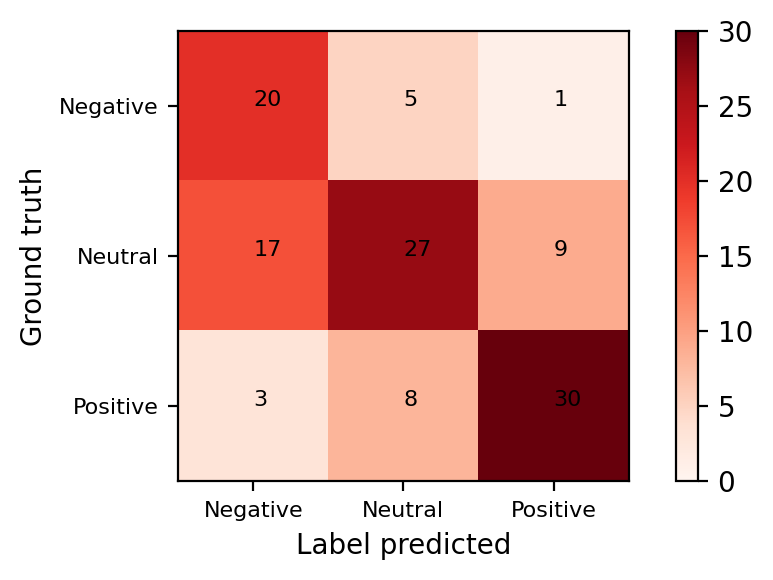

In [4]:
plt.figure(figsize = (5,3), dpi = 200)

plt.imshow(cm, cmap = 'Reds', vmin = 0)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i, j, s = cm.T[i,j], size = 8)

plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], size = 8)
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], size = 8)
        
plt.ylabel('Ground truth')
plt.xlabel('Label predicted')

plt.colorbar()
plt.tight_layout()
plt.savefig('PySentimiento_confusion_matrix.pdf')
plt.show()

#### Metrics

In [5]:
print('Accuracy: ' , accuracy_score(data['Sentiment expected'], data['Sentiment predicted']))

Accuracy:  0.6416666666666667


In [6]:
print('F1 score: ', f1_score(data['Sentiment expected'], data['Sentiment predicted'], average='macro'))

F1 score:  0.6424821693638898


F1 score fluctuations:

In [7]:
iterations = []
for i in range(1000):
    y_true, y_pred = data.sample(n = data.shape[0], replace = True)[['Sentiment predicted', 'Sentiment expected']].to_numpy().T
    iterations.append(f1_score(y_true, y_pred, average='macro'))
print('F1-score 90\% CI: ', np.quantile(iterations, q = [0.05, 0.95]))

F1-score 90\% CI:  [0.57350046 0.70955251]
